In [1]:
# Lab | Handling Data Imbalance in Classification Models

#For this lab and in the next lessons we will build a model on customer churn binary classification problem. You will be using `Customer-Churn.txt` file.

### Scenario

#You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

### Instructions

#In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

#Here is the list of steps to be followed (building a simple model without balancing the data):

#- Import the required libraries and modules that you would need.
#- Read that data into Python and call the dataframe `churnData`.
#- Check the datatypes of all the columns in the data. You would see that the column `TotalCharges` is object type. Convert this column into numeric type using `pd.to_numeric` function.
#- Check for null values in the dataframe. Replace the null values.
#- Use the following features: `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`:
  #- Scale the features either by using normalizer or a standard scaler.
  #- Split the data into a training set and a test set.
  #- Fit a logistic regression model on the training data.
  #- Check the accuracy on the test data.

#**Note**: So far we have not balanced the data.

#Managing imbalance in the dataset

#- Check for the imbalance.
#- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
#- Each time fit the model and see how the accuracy of the model is.

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm

In [3]:
#- Importa las librerías y módulos que necesites.
#- Lee los datos en Python y llama al dataframe `churnData`.
#- Comprueba los tipos de datos de todas las columnas de los datos. Verás que la columna `TotalCharges` es de tipo objeto. Convierta esta columna a tipo numérico utilizando la función `pd.to_numeric`.
#- Compruebe si hay valores nulos en el marco de datos. Reemplace los valores nulos.
#- Utilice las siguientes funciones: `tenure`, `SeniorCitizen`, `MonthlyCharges` y `TotalCharges`:
  #- Escalar las características mediante el uso de normalizador o un escalador estándar.
  #- Divida los datos en un conjunto de entrenamiento y un conjunto de prueba.
  #- Ajustar un modelo de regresión logística a los datos de entrenamiento.
  #- Comprobar la precisión en los datos de prueba.

In [4]:
churnData = pd.read_csv('Customer-Churn.txt')
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [5]:
churnData.shape

(7043, 16)

In [6]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [7]:
churnData.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
def identify_column_types(df):
    """
    Identifica y devuelve las columnas numéricas y categóricas de un DataFrame.
    
    Parámetros:
    df (pd.DataFrame): El DataFrame a analizar.
    
    Retorna:
    dict: Un diccionario con dos claves 'numerical' y 'categorical', cada una conteniendo una lista de nombres de columnas.
    """
    numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    return {
        'numerical': numerical_cols,
        'categorical': categorical_cols
    }

# Ejemplo de uso
# Asume que churnData es tu DataFrame
column_types = identify_column_types(churnData)
print("Columnas numéricas:", column_types['numerical'])
print("Columnas categóricas:", column_types['categorical'])

Columnas numéricas: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Columnas categóricas: ['gender', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'TotalCharges', 'Churn']


In [9]:
churnData.columns = churnData.columns.str.lower().str.replace(' ', '_')
churnData.tail()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes
7042,Male,0,No,No,66,Yes,Yes,No,Yes,Yes,Yes,Yes,Two year,105.65,6844.5,No


In [10]:
# Convertir la columna 'TotalCharges' a tipo numérico
churnData['totalcharges'] = pd.to_numeric(churnData['totalcharges'], errors='coerce')

# Verificar el tipo de la columna después de la conversión
print(churnData['totalcharges'].dtype)

# Verificar si hay valores NaN
print(churnData['totalcharges'].isna().sum())

float64
11


In [11]:
churnData.totalcharges.value_counts()

totalcharges
20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: count, Length: 6530, dtype: int64

In [12]:
# Filtrar las filas que tienen valores nulos en la columna 'totalcharges'
null_rows = churnData[churnData['totalcharges'].isnull()]
null_rows

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
488,Female,0,Yes,Yes,0,No,Yes,No,Yes,Yes,Yes,No,Two year,52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,Yes,Yes,Yes,No,Yes,Yes,Two year,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,Yes,Yes,Yes,Yes,Yes,No,Two year,56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,No,Yes,Yes,Yes,Yes,No,Two year,73.35,NaN,No


In [13]:
# Identificar las filas donde 'totalcharges' es NaN
null_totalcharges = churnData['totalcharges'].isnull()

# Multiplicar los valores de 'monthlycharges' por 24 en las filas donde 'totalcharges' es NaN
churnData.loc[null_totalcharges & (churnData.index != 5218), 'monthlycharges'] *= 24

# Multiplicar por 12 en la fila 5218
churnData.loc[5218, 'monthlycharges'] *= 12

# Rellenar los valores NaN en 'totalcharges' con los nuevos valores de 'monthlycharges'
churnData['totalcharges'].fillna(churnData['monthlycharges'], inplace=True)

# Verificar que ya no hay valores NaN en 'totalcharges'
print(churnData['totalcharges'].isnull().sum())

0


In [14]:
null_rows = churnData[churnData['totalcharges'].isnull()]
null_rows

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn


In [15]:
#Decidi remplazar los 11 nulos de la columna totalcharges por la multiplicacion de monthlycharges con la columna contract que indica de cuanrto es el contrato firmado, me parecio el metedo que mas se puede acercar a la realidad.

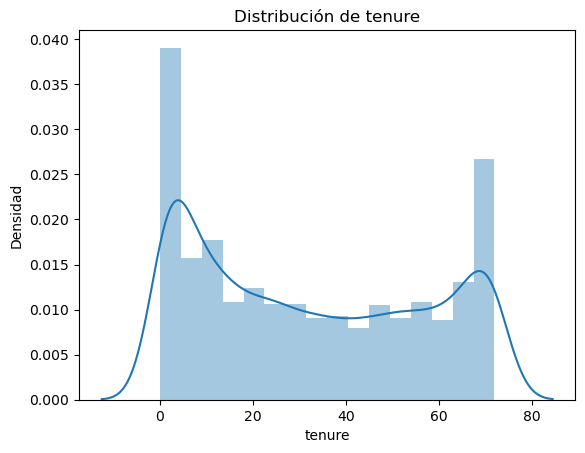

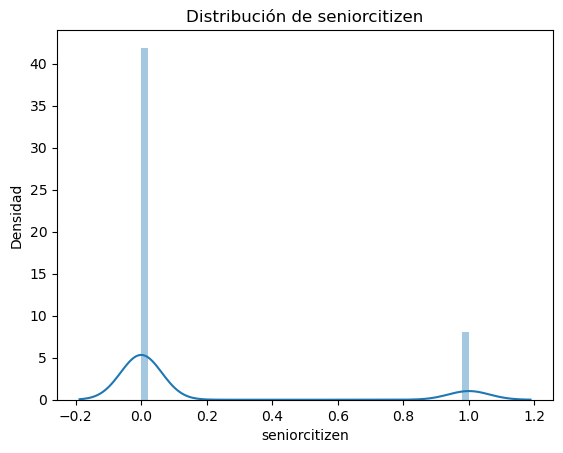

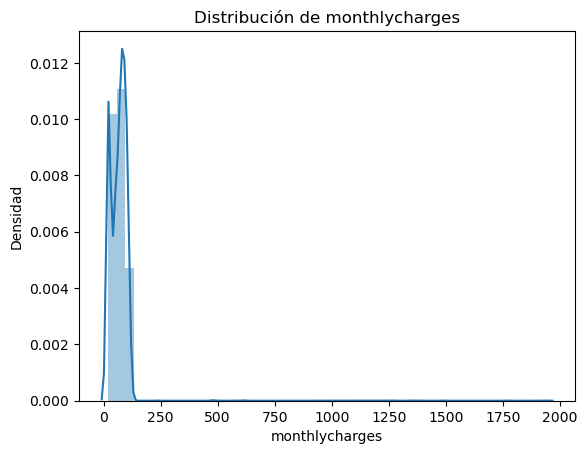

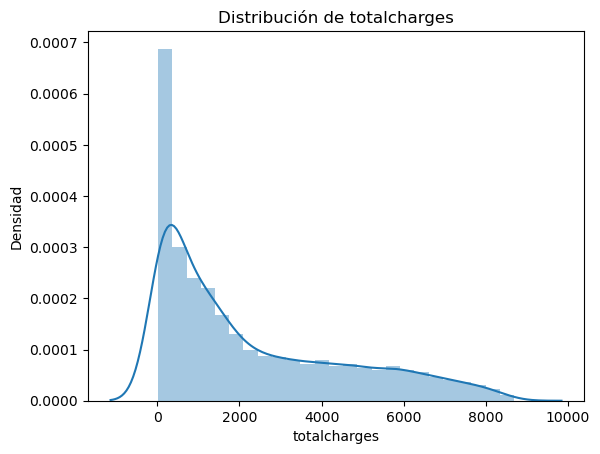

In [16]:
columns_to_plot = ['tenure', 'seniorcitizen', 'monthlycharges', 'totalcharges']
for column in columns_to_plot:
    sns.distplot(churnData[column])
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Densidad')
    plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#Scaling los datos:
# Seleccionar las características y la variable objetivo
X = churnData[['tenure', 'seniorcitizen', 'monthlycharges', 'totalcharges']]
y = churnData['churn']

# Escalar las características utilizando un escalador estándar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Ajustar un modelo de regresión logística a los datos de entrenamiento
model = LogisticRegression()
model.fit(X_train, y_train)

# Imprimir el rendimiento del modelo en el conjunto de prueba
print("Accuracy on test set:", model.score(X_test, y_test))

Accuracy on test set: 0.7906316536550745


In [18]:
from sklearn.preprocessing import Normalizer

#Normalizando:
# Seleccionar las características y la variable objetivo
X = churnData[['tenure', 'seniorcitizen', 'monthlycharges', 'totalcharges']]
y = churnData['churn']

# Normalizar las características
normalizer = Normalizer()
X_normalized = normalizer.fit_transform(X)

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Ajustar un modelo de regresión logística a los datos de entrenamiento
model = LogisticRegression()
model.fit(X_train, y_train)

# Imprimir el rendimiento del modelo en el conjunto de prueba
print("Accuracy on test set:", model.score(X_test, y_test))

Accuracy on test set: 0.7615330021291696


In [19]:
#Conclusión: por su accuracy nos quedamos con el Scaling
#En resumen, la estandarización es preferible para churnData debido a su capacidad para mejorar la convergencia del modelo, reducir el impacto de los outliers y simplificar la interpretación de los coeficientes. 
#Esto puede conducir a un mejor rendimiento general del modelo y una mayor capacidad de interpretación de los resultados.

In [20]:
#Gestión del desequilibrio en el conjunto de datos

#- Comprobar el desequilibrio.
#- Utiliza las estrategias de remuestreo utilizadas en clase para crear un equilibrio entre las dos clases.
#- Cada vez ajustar el modelo y ver cómo la precisión del modelo es.

In [21]:
# Convertir la columna 'churn' a formato numérico
churnData['churn'] = churnData['churn'].map({'Yes': 1, 'No': 0})

# Definir las características (X) y la variable objetivo (y)
X = churnData[['tenure', 'seniorcitizen', 'monthlycharges', 'totalcharges']]
y = churnData['churn']

# Agregar una columna constante para el término independiente
X_added_constant = sm.add_constant(X)

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X_added_constant).fit()

# Mostrar el resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     363.8
Date:                Wed, 29 May 2024   Prob (F-statistic):          3.64e-285
Time:                        00:15:52   Log-Likelihood:                -3574.0
No. Observations:                7043   AIC:                             7158.
Df Residuals:                    7038   BIC:                             7192.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4209      0.011     39.

In [22]:
#Managing imbalance in the dataset

#- Check for the imbalance.
#- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
#- Each time fit the model and see how the accuracy of the model is.

In [23]:
# Verificar el desbalanceo
churnData['churn'].value_counts()

churn
0    5174
1    1869
Name: count, dtype: int64

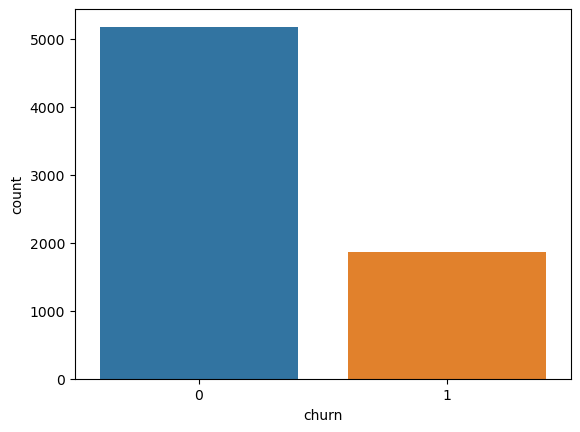

In [24]:
# Visualizar el desbalanceo
sns.countplot(x='churn', data=churnData)
plt.show()

In [25]:
churnData.sample(5)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
2859,Male,1,Yes,No,70,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two year,88.55,6306.50,0
3229,Female,0,No,No,12,Yes,No,No,No,No,Yes,Yes,Month-to-month,94.20,1046.10,1
372,Male,0,No,Yes,24,No,Yes,No,No,Yes,No,No,Two year,35.75,830.80,0
3432,Female,0,Yes,No,70,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two year,94.80,6859.05,0
6873,Female,0,Yes,Yes,68,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two year,89.05,6185.80,0


In [26]:
selected_columns = ['tenure', 'seniorcitizen', 'monthlycharges', 'totalcharges', 'churn']
churnData_selected = churnData.loc[:, selected_columns]

In [27]:
#Downsampling:
category_0 = churnData_selected[churnData_selected['churn'] == 0]
category_1 = churnData_selected[churnData_selected['churn'] == 1]

In [28]:
category_0 = category_0.sample(len(category_1))
print(category_0.shape)
print(category_1.shape)

(1869, 5)
(1869, 5)


In [29]:
churnDatax = pd.concat([category_0, category_1], axis=0)
#shuffling the data
churnDatax = churnDatax.sample(frac=1)
churnDatax['churn'].value_counts()

churn
0    1869
1    1869
Name: count, dtype: int64

In [30]:
Y_balanced=churnDatax['churn']
X_balanced=churnDatax.drop(columns=['churn'])

In [31]:
X_train, X_test, y_train, y_test= train_test_split(X_balanced,Y_balanced, test_size=0.2, random_state=42)

In [32]:
model = sm.Logit(y_train,X_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.540646
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 2990
Model:                          Logit   Df Residuals:                     2986
Method:                           MLE   Df Model:                            3
Date:                Wed, 29 May 2024   Pseudo R-squ.:                  0.2200
Time:                        00:15:52   Log-Likelihood:                -1616.5
converged:                       True   LL-Null:                       -2072.5
Covariance Type:            nonrobust   LLR p-value:                2.260e-197
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
tenure            -0.0788      0.005    -15.039      0.000      -0.089      -0.069
seniorcitizen      0.7332      0.113      6.483      0.000       0.512       0.955
monthlycharges     0.0183      0.001     17.714      0.000       0.016       0.020
totalcharges       0.0003   5.61e-05      5.938      0.000       0.000       0.000
==================================================================================
"""

In [33]:
model=LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [34]:
model.score(X_train, y_train)

0.7394648829431438

In [35]:
model.score(X_test, y_test)

0.7299465240641712

In [36]:
#Upsampling, method 1:
selected_columns = ['tenure', 'seniorcitizen', 'monthlycharges', 'totalcharges', 'churn']
churnData_selected2 = churnData.loc[:, selected_columns]

In [37]:
churnData_selected2.shape

(7043, 5)

In [38]:
churnData_selected2.churn.value_counts()

churn
0    5174
1    1869
Name: count, dtype: int64

In [39]:
category_0 = churnData_selected2[churnData_selected2['churn'] == 0]
category_1 = churnData_selected2[churnData_selected2['churn'] == 1]

In [40]:
#Balanceamos las dos categorias
category_1 = category_1.sample(len(category_0), replace=True)
print(category_1.shape)
print(category_0.shape)

(5174, 5)
(5174, 5)


In [41]:
churnData_selected2 = pd.concat([category_1, category_0], axis=0)
#shuffling the data
churnData_selected2 = churnData_selected2.sample(frac=1)
churnData_selected2['churn'].value_counts()

churn
0    5174
1    5174
Name: count, dtype: int64

In [42]:
Y_balanced1=churnData_selected2['churn']
X_balanced1=churnData_selected2.drop(columns=['churn'])

In [43]:
X_train, X_test, y_train, y_test= train_test_split(X_balanced1,Y_balanced1, test_size=0.2, random_state=42)

In [44]:
model = sm.Logit(y_train,X_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.553137
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 8278
Model:                          Logit   Df Residuals:                     8274
Method:                           MLE   Df Model:                            3
Date:                Wed, 29 May 2024   Pseudo R-squ.:                  0.2020
Time:                        00:15:52   Log-Likelihood:                -4578.9
converged:                       True   LL-Null:                       -5737.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
tenure            -0.0730      0.003    -24.694      0.000      -0.079      -0.067
seniorcitizen      0.8162      0.067     12.192      0.000       0.685       0.947
monthlycharges     0.0161      0.001     26.542      0.000       0.015       0.017
totalcharges       0.0003   3.22e-05      9.994      0.000       0.000       0.000
==================================================================================
"""

In [45]:
model=LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [46]:
model.score(X_train, y_train)

0.72940323749698

In [47]:
model.score(X_test, y_test)

0.7434782608695653

In [48]:
#Upsampling using SMOTE:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [49]:
selected_columns = ['tenure', 'seniorcitizen', 'monthlycharges', 'totalcharges', 'churn']
churnData_selected3 = churnData.loc[:, selected_columns]

In [50]:
y = churnData_selected3['churn']
X = churnData_selected3.drop(['churn'], axis=1)
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

churn
0    5174
1    5174
Name: count, dtype: int64

In [51]:
X_train, X_test, y_train, y_test= train_test_split(X_sm,y_sm, test_size=0.2, random_state=42)

In [52]:
model = sm.Logit(y_train,X_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.552068
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 8278
Model:                          Logit   Df Residuals:                     8274
Method:                           MLE   Df Model:                            3
Date:                Wed, 29 May 2024   Pseudo R-squ.:                  0.2035
Time:                        00:15:53   Log-Likelihood:                -4570.0
converged:                       True   LL-Null:                       -5737.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
tenure            -0.0843      0.003    -25.733      0.000      -0.091      -0.078
seniorcitizen      0.0076      0.073      0.103      0.918      -0.136       0.152
monthlycharges     0.0189      0.001     30.669      0.000       0.018       0.020
totalcharges       0.0004   3.47e-05     12.170      0.000       0.000       0.000
==================================================================================
"""

In [53]:
model=LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [54]:
model.score(X_train, y_train)

0.7309736651365064

In [55]:
model.score(X_test, y_test)

0.7434782608695653

In [120]:
#Análisis de los Resultados:

#Interpretación General primer modelo ols:

#R-squared (0.171): Indica que el modelo explica aproximadamente el 17.1% de la variabilidad en la variable objetivo (churn). Esto sugiere que el modelo no captura una gran parte de la variabilidad. 
#Aunque el modelo es estadísticamente significativo, la baja R-squared indica que no explica bien la variabilidad de churn. 

#Downsampling:
#model.score(X_train, y_train) = 0.7394648829431438
#model.score(X_test, y_test) = 0.7299465240641712

#Upsampling, method 1:
#model.score(X_train, y_train) = 0.72940323749698
#model.score(X_test, y_test) = 0.7434782608695653

#Upsampling using SMOTE:
#model.score(X_train, y_train) = 0.7309736651365064
#model.score(X_test, y_test) = 0.7434782608695653

#Precisión en el Conjunto de Entrenamiento:

#El modelo entrenado con downsampling muestra la mayor precisión en el conjunto de entrenamiento (0.7395). 
#Sin embargo, esto puede indicar que el modelo está mejor ajustado a los datos de entrenamiento, lo que no siempre es deseable ya que puede llevar a sobreajuste.
#Los métodos de upsampling (method 1 y SMOTE) tienen precisiones de entrenamiento ligeramente menores, pero esto puede ser beneficioso ya que un ajuste más bajo en el conjunto de entrenamiento puede llevar a un mejor generalización en el conjunto de prueba.

#Precisión en el Conjunto de Prueba:

#El modelo entrenado con downsampling tiene la menor precisión en el conjunto de prueba (0.7299), lo que sugiere que no generaliza tan bien a nuevos datos.
#Los modelos entrenados con upsampling (method 1 y SMOTE) tienen precisiones de prueba más altas (0.7435), indicando que estos métodos permiten al modelo generalizar mejor y predecir más eficazmente en nuevos datos.

#Conclusiones:

#Dado que los modelos entrenados con upsampling (method 1 y SMOTE) muestran mejores resultados en el conjunto de prueba, se recomienda utilizar técnicas de upsampling para abordar el desequilibrio en los datos.